<a href="https://colab.research.google.com/github/SisiDzy/Machine-Learning/blob/main/ML_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Part 1: Regression on California Test Scores

1. Find the url for the California Test Score Data Set from the following website: https://vincentarelbundock.github.io/Rdatasets/datasets.html

  Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data. https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

  The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
d.head()

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

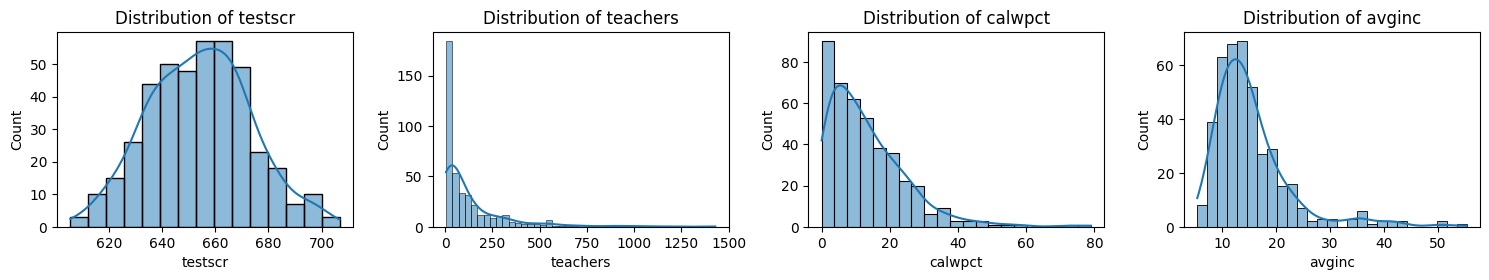

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, var in enumerate(["testscr"] + ['teachers'] + ['calwpct'] + ['avginc']):
    plt.subplot(2, 4, i+1)
    sns.histplot(d[var], kde=True)
    plt.title(f"Distribution of {var}")
plt.tight_layout()
plt.show()

1.2 Visualize the dependency of the target on each feature from 1.1.

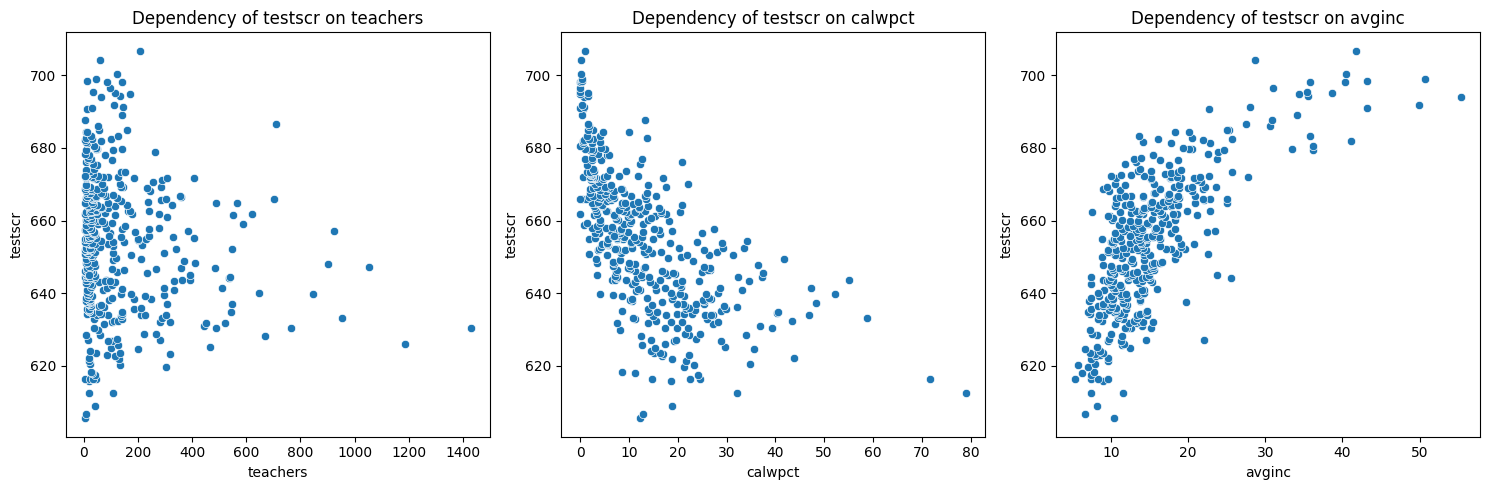

In [ ]:
plt.figure(figsize=(15, 5))
for i, var in enumerate(['teachers'] + ['calwpct'] + ['avginc']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=d, x=var, y="testscr")
    plt.title(f"Dependency of testscr on {var}")
plt.tight_layout()
plt.show()

1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

X = d.loc[:, ~d.columns.isin(["testscr", "readscr", "mathscr", "rownames", "distcod", 'county', 'district', 'grspan'])]
y = d["testscr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

models = {
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Linear Regression (OLS)': LinearRegression(),
    'Ridge': Ridge(max_iter=10000),
    'Lasso': Lasso(max_iter=10000)
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    scores2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2")
    print(f'{model_name}:')
    print(f'Mean R^2 across folds: {np.mean(scores):.3f}')
    print(f'Mean R^2 across folds after scaling: {np.mean(scores2):.3f} \n')

KNN:
Mean R^2 across folds: -0.054
Mean R^2 across folds after scaling: 0.711 

Linear Regression (OLS):
Mean R^2 across folds: 0.781
Mean R^2 across folds after scaling: 0.781 

Ridge:
Mean R^2 across folds: 0.783
Mean R^2 across folds after scaling: 0.783 

Lasso:
Mean R^2 across folds: 0.787
Mean R^2 across folds after scaling: 0.784 



Scaling the data with the StandardScaler helps a lot when using the KNN for regression. But for other models, it does not change the mean R^2 value or even lowers it.

1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters for KNN: {}".format(grid_search.best_params_))
print("Best mean cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Test-set score: {:.3f} \n".format(grid_search.score(X_test_scaled, y_test)))

param_grid_2 = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_2 = GridSearchCV(Ridge(max_iter=10000), param_grid=param_grid_2, cv=5)
grid_search_2.fit(X_train, y_train)
print("Best hyperparameters for Ridge:", grid_search_2.best_params_)
print("Best mean cross-validation score: {:.3f}".format(grid_search_2.best_score_))
print("Test-set score: {:.3f} \n".format(grid_search_2.score(X_test, y_test)))

grid_search_3 = GridSearchCV(Lasso(max_iter=10000), param_grid=param_grid_2, cv=5)
grid_search_3.fit(X_train, y_train)
print("Best hyperparameters for Lasso:", grid_search_3.best_params_)
print("Best mean cross-validation score: {:.3f}".format(grid_search_3.best_score_))
print("Test-set score: {:.3f} \n".format(grid_search_3.score(X_test, y_test)))

Best parameters for KNN: {'n_neighbors': 11}
Best mean cross-validation score: 0.720
Test-set score: 0.770 

Best hyperparameters for Ridge: {'alpha': 100}
Best mean cross-validation score: 0.785
Test-set score: 0.808 

Best hyperparameters for Lasso: {'alpha': 1}
Best mean cross-validation score: 0.787
Test-set score: 0.807 



After tuning the parameters of the models using GridSearchCV, KNN generates a much better result, Ridge's result is 0.002 higher, and Lasso's result is 0.003 higher.

1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [ ]:
rdg = Ridge(alpha=100, max_iter=10000).fit(X_train, y_train)
lso = Lasso(alpha=1, max_iter=10000).fit(X_train, y_train)

print(rdg.coef_)
print(lso.coef_)

[ 6.14510552e-05 -5.45118391e-03 -1.04690834e-01 -3.65354533e-01
  1.95377061e-03 -1.08244934e-02  1.95717784e-03 -2.98436730e-01
  5.10488808e-01 -1.96076963e-01]
[-3.49967757e-04  2.49295965e-03 -8.87575499e-02 -3.79258543e-01
  1.92082688e-03  0.00000000e+00  2.48221832e-03 -0.00000000e+00
  4.81687904e-01 -1.86583703e-01]


For most features, they agree on the features' importance as they all assign non-zero coefficients to them. However, they sometimes give coefficients of different signs (+/-) to the same feature, meaning they suggest correlations in different directions, and sometimes they give coefficients with different magnitudes but the same sign, meaning they kind of disagree on the level of the features' importance. Most noticeably, Lasso gives two 0 coefficients, but Ridge gives non-zero coefficients to the features, meaning Lasso and Ridge disagree on the features' importance.

1.6 Now that you have experimented with different models, discuss which final model you would choose to predict new data

I would choose the Ridge model to predict new data between the two best linear models Ridge and Lasso, because even though its cross-validation score is lower than Lasso's, it has a 0.001 higher test-set score, which is more important for making this decision.

### Part 2: Classification on red and white wine characteristics

First, import the red and the white wine csv files into separate pandas dataframes from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.

The target data (i.e. the dependent variable) is "winetype".

In [ ]:
d_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
d_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

d_red["winetype"] = 1
d_white["winetype"] = 0

d_wine = pd.concat([d_red, d_white], axis=0)
d_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

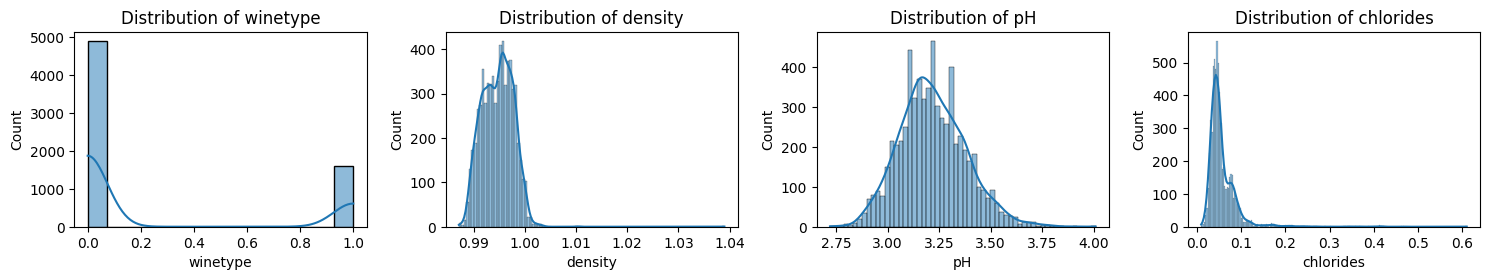

In [ ]:
plt.figure(figsize=(15, 5))
for i, var in enumerate(["winetype"] + ["density"] + ["pH"] + ["chlorides"]):
    plt.subplot(2, 4, i+1)
    sns.histplot(d_wine[var], kde=True)
    plt.title(f"Distribution of {var}")
plt.tight_layout()
plt.show()

2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

X = d_wine.loc[:, d_wine.columns != 'winetype']
y = d_wine["winetype"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(penalty=None, max_iter=10000),
    'Penalized Logistic Regression': LogisticRegression(max_iter=10000)
    }

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'{model_name}:')
    print(f'Mean accuracy across folds: {np.mean(scores):.3f}')
    print(f'Mean accuracy across folds after scaling: {np.mean(scores2):.3f} \n')

KNN:
Mean accuracy across folds: 0.943
Mean accuracy across folds after scaling: 0.992 

Logistic Regression:
Mean accuracy across folds: 0.992
Mean accuracy across folds after scaling: 0.994 

Penalized Logistic Regression:
Mean accuracy across folds: 0.986
Mean accuracy across folds after scaling: 0.994 



For results generated by these three models, KNN has a much lower accuracy than the other two models, and Logistic Regression has a 0.006 higher accuracy than Penalized Logistic Regression. After scaling, KNN's accuracy is much higher and catchs up the results of the other two models, and Logistic Regression and Penalized Logistic Regression have the same accuracy.

2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [ ]:
import warnings

# Ignore the specific warning
warnings.filterwarnings("ignore", message="Setting penalty=None will ignore the C and l1_ratio parameters", category=UserWarning)

# KNN
param_grid = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters for KNN: {}".format(grid_search.best_params_))
print("Best mean cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Test-set score: {:.3f} \n".format(grid_search.score(X_test_scaled, y_test)))

# Logistic regression and penalized logistic regression
param_grid_2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_2 = GridSearchCV(LogisticRegression(penalty=None), param_grid=param_grid_2, cv=5)
grid_search_2.fit(X_train_scaled, y_train)
print("Best parameters for Logistic Regression: {}".format(grid_search_2.best_params_))
print("Best mean cross-validation score: {:.3f}".format(grid_search_2.best_score_))
print("Test-set score: {:.3f} \n".format(grid_search_2.score(X_test_scaled, y_test)))

grid_search_3 = GridSearchCV(LogisticRegression(), param_grid=param_grid_2, cv=5)
grid_search_3.fit(X_train_scaled, y_train)
print("Best parameters for Penalized Logistic Regression: {}".format(grid_search_3.best_params_))
print("Best mean cross-validation score: {:.3f}".format(grid_search_3.best_score_))
print("Test-set score: {:.3f}".format(grid_search_3.score(X_test_scaled, y_test)))

Best parameters for KNN: {'n_neighbors': 10}
Best mean cross-validation score: 0.994
Test-set score: 0.989 

Best parameters for Logistic Regression: {'C': 0.001}
Best mean cross-validation score: 0.994
Test-set score: 0.991 

Best parameters for Penalized Logistic Regression: {'C': 10}
Best mean cross-validation score: 0.994
Test-set score: 0.991


After tuning the parameters using GridSearchCV, the accuracies of Logistic Regression and Penalized Logistic Regression do not change, but the accuracy of KNN becomes 0.002 higher and is the same with the accuracies of the other two models.

2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Or if you change the random state of the split into training and test data?

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kf)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters for KNN: {}".format(grid_search.best_params_))
print("Best mean cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Test-set score: {:.3f} \n".format(grid_search.score(X_test_scaled, y_test)))

grid_search_2 = GridSearchCV(LogisticRegression(penalty=None), param_grid=param_grid_2, cv=kf)
grid_search_2.fit(X_train_scaled, y_train)
print("Best parameters for Logistic Regression: {}".format(grid_search_2.best_params_))
print("Best mean cross-validation score: {:.3f}".format(grid_search_2.best_score_))
print("Test-set score: {:.3f} \n".format(grid_search_2.score(X_test_scaled, y_test)))

grid_search_3 = GridSearchCV(LogisticRegression(), param_grid=param_grid_2, cv=kf)
grid_search_3.fit(X_train_scaled, y_train)
print("Best parameters for Penalized Logistic Regression: {}".format(grid_search_3.best_params_))
print("Best mean cross-validation score: {:.3f}".format(grid_search_3.best_score_))
print("Test-set score: {:.3f}".format(grid_search_3.score(X_test_scaled, y_test)))

Best parameters for KNN: {'n_neighbors': 5}
Best mean cross-validation score: 0.994
Test-set score: 0.989 

Best parameters for Logistic Regression: {'C': 0.001}
Best mean cross-validation score: 0.994
Test-set score: 0.991 

Best parameters for Penalized Logistic Regression: {'C': 10}
Best mean cross-validation score: 0.994
Test-set score: 0.991


Only the parameter for KNN changes.

2.5 Lastly, discuss which final model you would choose to predict new data.

I would choose Logistic Regression, since it and Penalized Logistic Regression all have the highest test-set score, but it is simpler than Penalized Logistic Regression.